# STAT2004 Assignment

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import seaborn as sbn
from pipeline_utils import ColumnRemover
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('high_diamond_ranked_10min.csv')
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
data['blueWins'].value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

## Removing Duplicate or Dependent Columns

In [4]:
to_drop = ['gameId','blueGoldDiff','blueExperienceDiff','redFirstBlood','redGoldDiff','redExperienceDiff']
data = data.drop(to_drop, axis = 1)

In [5]:
data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   fl

## Setting columns to categorical or numeric

In [6]:
cat_cols = ['blueFirstBlood']
num_cols = []
for col in data:
    if col not in cat_cols:
        num_cols.append(col)
num_cols.remove('blueWins')

## Plotting Pairs

In [8]:
for col in num_cols:
    fig = sbn.boxplot(data = data, x='blueWins', y=col, palette=['red','blue'])
    fig.set_xticklabels(labels=['Red Wins','Blue Wins'])
    plt.title('Boxplot of '+str(col))
    plt.xlabel('Game Outcome')
    plt.savefig('exploratory_plots/'+str(col)+'_fig')
    plt.clf()

&lt;Figure size 432x288 with 0 Axes&gt;

## Performing PCA

In [7]:
dpca = PCA().fit(data[num_cols])

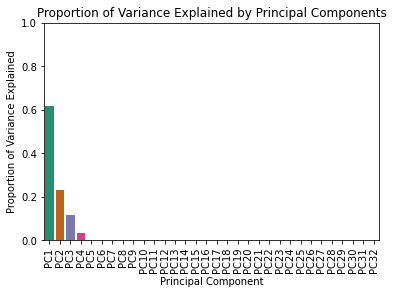

In [8]:
pcs = ['PC'+str(i) for i in range(1, dpca.n_features_+1)]

bplot = sbn.barplot(x = pcs, y = dpca.explained_variance_ratio_, palette='Dark2')
bplot.set_xticklabels(labels = pcs,rotation=90)
plt.ylim(0,1)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Proportion of Variance Explained by Principal Components')
plt.show()

In [9]:
pd.DataFrame({
    'Principal Components' : pcs, 
    'Explained Variance' : dpca.explained_variance_ratio_
    })

,Principal Components,Explained Variance
0,PC1,6.188574e-01
1,PC2,2.323772e-01
2,PC3,1.164981e-01
3,PC4,3.207694e-02
4,PC5,4.629295e-05
5,PC6,4.455786e-05
6,PC7,3.960710e-05
7,PC8,3.703330e-05
8,PC9,1.056647e-05
9,PC10,9.078127e-06


There is a significant decrease in variance explained from by all principal components after the 23rd. Removing components \[24, 31].

## Splitting Training and Test

In [14]:
train_data, test_data = train_test_split(data, stratify = data['blueWins'], test_size = 0.2, random_state=43)

In [15]:
train_data['blueWins'].value_counts()

0    3959
1    3944
Name: blueWins, dtype: int64

## Preprocessing

In [12]:
numerical_transform = Pipeline(steps=[
    ('Scaler', StandardScaler()),
    ('PCA', PCA()),
    ('Component Remover', ColumnRemover(rm_cols=[i for i in range(24,32)]))
])

preprocessor = ColumnTransformer(transformers = [
    ('Numeric Transforms', numerical_transform, num_cols)
], remainder = 'passthrough', n_jobs=-1)

In [13]:
y_train = train_data['blueWins']
x_train = train_data.drop('blueWins', axis=1)

y_test = test_data['blueWins']
x_test = test_data.drop('blueWins', axis=1)

## Performing Cluster Analysis

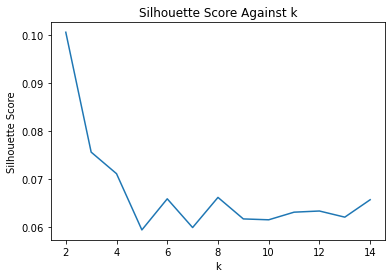

In [15]:
x_tmp = preprocessor.fit_transform(x_train)

sil = []
ks = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k,random_state=67).fit(x_tmp)
    sil.append(silhouette_score(x_tmp,kmeans.labels_,metric='manhattan'))
    ks.append(k)
plt.plot(ks,sil)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Against k')
plt.show()

Silhouette scores indicate poor clustering. Thus, clustering will be removed from the model.

## Testing Neural Network

In [16]:
cnn = Pipeline(steps=[
    ('Preprocessing', preprocessor),
    ('NN', MLPClassifier())
])

In [17]:
cnn = cnn.fit(x_train, y_train)

In [18]:
print(classification_report(y_pred = cnn.predict(x_test), y_true = y_test))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69       993
           1       0.69      0.68      0.68       983

    accuracy                           0.68      1976
   macro avg       0.68      0.68      0.68      1976
weighted avg       0.68      0.68      0.68      1976



## Random Forest

In [63]:
crf = Pipeline(steps=[
    ('Preprocessing', preprocessor),
    ('RF', RandomForestClassifier())
])

In [64]:
crf = crf.fit(x_train, y_train)

In [65]:
print(classification_report(y_pred = crf.predict(x_test), y_true = y_test))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       993
           1       0.73      0.70      0.72       983

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976

